In [1]:
import matplotlib.pyplot as plt
import csv


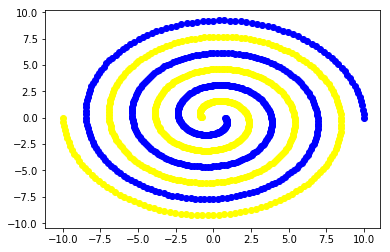

In [11]:
# taken from two-spirals.c by Matt White
import math

def create_spiral_dataset(density=1, maxRadius=6.5):
    x_spiral = []
    y_spiral = []
    points = 96 * density # total number of points to generate
    
    for num in range(points):
        # Angle is based on the current iteration times pi/16, divided by density
        angle = (num * math.pi) / ( 16.0 * density)
        
        # Radius is the maximum radius times the fraction of iterations left
        radius = maxRadius * ( (104.0 * density) - num) / (104.0 * density)
        
        # calculate x and y based on cos and sin, according to the paper
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        x_spiral.append([x, y]) # non mirror point
        y_spiral.append([0]) # label for non mirror
        x_spiral.append([-x, -y]) # mirroring point for the spiral that goes the other way around
        y_spiral.append([1]) # label mirror
        
    return x_spiral, y_spiral

x, y = create_spiral_dataset(density=5, maxRadius=10)

blue_x = []
blue_y = []
yellow_x = []
yellow_y = []

for idx, point in enumerate(x):
    if y[idx][0] == 0:
        # non-mirror, blue
        blue_x.append(point[0])
        blue_y.append(point[1])
    else:
        yellow_x.append(point[0])
        yellow_y.append(point[1])

plt.scatter(blue_x, blue_y, color='blue')
plt.scatter(yellow_x, yellow_y, color='yellow')

plt.show()

        

In [16]:
import tensorflow as tf
import numpy as np

# convert dataset into numpy array
np_x = np.array(x) # features 
np_y = np.array(y) # labels

print(np_x.shape)
print(np_y.shape)

(960, 2)
(960, 1)


In [96]:
# placeholders for data
x_pl = tf.placeholder(tf.float32, [None, np_x.shape[1]], name='feature_inputs')
y_pl = tf.placeholder(tf.float32, [None, np_y.shape[1]], name='labels')

l0_units = 40
l1_units = 80
l2_units = 40

# Neural Network
# 1st layer
l0_w = tf.Variable(tf.random_normal([2, l0_units]))
l0_b = tf.Variable(tf.random_normal([l0_units]))
l0 = tf.nn.sigmoid(tf.add(tf.matmul(x_pl, l0_w), l0_b))

# 2nd layer
l1_w = tf.Variable(tf.random_normal([l0_units, l1_units]))
l1_b = tf.Variable(tf.random_normal([l1_units]))
l1 = tf.nn.sigmoid(tf.add(tf.matmul(l0, l1_w), l1_b))

# 3rd layer
l2_w = tf.Variable(tf.random_normal([l1_units, l2_units]))
l2_b = tf.Variable(tf.random_normal([l2_units]))
l2 = tf.nn.sigmoid(tf.add(tf.matmul(l1, l2_w), l2_b))

# 4rd layer
l3_w = tf.Variable(tf.random_normal([l2_units, 1]))
l3_b = tf.Variable(tf.random_normal([1]))
l3 = tf.nn.sigmoid(tf.add(tf.matmul(l2, l3_w), l3_b))

# cost function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_pl, predictions=l3))

# optimizer algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [101]:
# Required: Run previous cell to create the neural network model
# training
n_epochs = 10000

errors = []
predictions = None
activation_range = np.arange(-6, 6, 0.1)
coordinates = [[x, y] for x in activation_range for y in activation_range]

with tf.Session() as sess:
    # tf.global_variables_initializer().run()
    
    sess.run(tf.global_variables_initializer())
    for i in range(n_epochs):
        _, error = sess.run([optimizer, cost], feed_dict={x_pl: np_x, y_pl: np_y})
        errors.append(error)
        print('epoch: ', i, 'error: ', error)
        
    # Use the trained model to classify all points in a 10 x 10 graph
    predictions = sess.run(l3, feed_dict={x_pl: coordinates}) # use numpy.round?

epoch:  0 error:  0.39986473
epoch:  1 error:  0.34839526
epoch:  2 error:  0.3051335
epoch:  3 error:  0.28945535
epoch:  4 error:  0.28092873
epoch:  5 error:  0.27358952
epoch:  6 error:  0.2676215
epoch:  7 error:  0.26296118
epoch:  8 error:  0.25936353
epoch:  9 error:  0.25656304
epoch:  10 error:  0.25434276
epoch:  11 error:  0.25254294
epoch:  12 error:  0.25105086
epoch:  13 error:  0.24978775
epoch:  14 error:  0.24869905
epoch:  15 error:  0.24774672
epoch:  16 error:  0.24690367
epoch:  17 error:  0.24615066
epoch:  18 error:  0.24547309
epoch:  19 error:  0.24486004
epoch:  20 error:  0.24430266
epoch:  21 error:  0.2437938
epoch:  22 error:  0.24332751
epoch:  23 error:  0.24289866
epoch:  24 error:  0.24250278
epoch:  25 error:  0.24213597
epoch:  26 error:  0.2417949
epoch:  27 error:  0.2414765
epoch:  28 error:  0.24117838
epoch:  29 error:  0.24089798
epoch:  30 error:  0.24063346
epoch:  31 error:  0.24038301
epoch:  32 error:  0.24014506
epoch:  33 error:  0.2399

epoch:  280 error:  0.2238153
epoch:  281 error:  0.22377822
epoch:  282 error:  0.22374101
epoch:  283 error:  0.22370395
epoch:  284 error:  0.22366686
epoch:  285 error:  0.22362994
epoch:  286 error:  0.22359307
epoch:  287 error:  0.22355627
epoch:  288 error:  0.22351955
epoch:  289 error:  0.22348282
epoch:  290 error:  0.2234462
epoch:  291 error:  0.22340971
epoch:  292 error:  0.22337319
epoch:  293 error:  0.22333676
epoch:  294 error:  0.2233004
epoch:  295 error:  0.22326419
epoch:  296 error:  0.22322792
epoch:  297 error:  0.22319177
epoch:  298 error:  0.22315566
epoch:  299 error:  0.22311963
epoch:  300 error:  0.22308366
epoch:  301 error:  0.2230478
epoch:  302 error:  0.22301194
epoch:  303 error:  0.22297612
epoch:  304 error:  0.22294047
epoch:  305 error:  0.22290474
epoch:  306 error:  0.22286913
epoch:  307 error:  0.22283365
epoch:  308 error:  0.22279815
epoch:  309 error:  0.22276275
epoch:  310 error:  0.22272736
epoch:  311 error:  0.2226921
epoch:  312 e

epoch:  566 error:  0.21505049
epoch:  567 error:  0.21502236
epoch:  568 error:  0.21499424
epoch:  569 error:  0.21496607
epoch:  570 error:  0.21493794
epoch:  571 error:  0.2149098
epoch:  572 error:  0.21488161
epoch:  573 error:  0.21485354
epoch:  574 error:  0.21482536
epoch:  575 error:  0.21479712
epoch:  576 error:  0.21476898
epoch:  577 error:  0.21474081
epoch:  578 error:  0.21471262
epoch:  579 error:  0.21468441
epoch:  580 error:  0.21465619
epoch:  581 error:  0.21462794
epoch:  582 error:  0.21459974
epoch:  583 error:  0.2145715
epoch:  584 error:  0.21454325
epoch:  585 error:  0.21451497
epoch:  586 error:  0.2144867
epoch:  587 error:  0.21445845
epoch:  588 error:  0.21443017
epoch:  589 error:  0.21440189
epoch:  590 error:  0.21437363
epoch:  591 error:  0.21434529
epoch:  592 error:  0.21431701
epoch:  593 error:  0.2142887
epoch:  594 error:  0.21426035
epoch:  595 error:  0.214232
epoch:  596 error:  0.21420364
epoch:  597 error:  0.21417536
epoch:  598 er

epoch:  852 error:  0.2125899
epoch:  853 error:  0.21250798
epoch:  854 error:  0.21253696
epoch:  855 error:  0.21245505
epoch:  856 error:  0.21248412
epoch:  857 error:  0.21240218
epoch:  858 error:  0.21243128
epoch:  859 error:  0.21234922
epoch:  860 error:  0.2123785
epoch:  861 error:  0.21229643
epoch:  862 error:  0.21232578
epoch:  863 error:  0.21224362
epoch:  864 error:  0.21227303
epoch:  865 error:  0.21219082
epoch:  866 error:  0.21222036
epoch:  867 error:  0.21213809
epoch:  868 error:  0.21216777
epoch:  869 error:  0.21208534
epoch:  870 error:  0.21211514
epoch:  871 error:  0.21203269
epoch:  872 error:  0.21206254
epoch:  873 error:  0.21198006
epoch:  874 error:  0.21201004
epoch:  875 error:  0.21192747
epoch:  876 error:  0.2119576
epoch:  877 error:  0.21187498
epoch:  878 error:  0.21190509
epoch:  879 error:  0.21182248
epoch:  880 error:  0.21185277
epoch:  881 error:  0.21177006
epoch:  882 error:  0.2118004
epoch:  883 error:  0.21171764
epoch:  884 

epoch:  1144 error:  0.2054102
epoch:  1145 error:  0.20532541
epoch:  1146 error:  0.20536359
epoch:  1147 error:  0.20527887
epoch:  1148 error:  0.20531708
epoch:  1149 error:  0.20523238
epoch:  1150 error:  0.20527054
epoch:  1151 error:  0.20518583
epoch:  1152 error:  0.205224
epoch:  1153 error:  0.20513938
epoch:  1154 error:  0.20517759
epoch:  1155 error:  0.2050929
epoch:  1156 error:  0.20513113
epoch:  1157 error:  0.2050465
epoch:  1158 error:  0.20508467
epoch:  1159 error:  0.20500009
epoch:  1160 error:  0.2050383
epoch:  1161 error:  0.20495373
epoch:  1162 error:  0.2049919
epoch:  1163 error:  0.20490739
epoch:  1164 error:  0.2049456
epoch:  1165 error:  0.20486107
epoch:  1166 error:  0.20489922
epoch:  1167 error:  0.20481482
epoch:  1168 error:  0.20485303
epoch:  1169 error:  0.20476855
epoch:  1170 error:  0.20480667
epoch:  1171 error:  0.2047223
epoch:  1172 error:  0.20476049
epoch:  1173 error:  0.2046762
epoch:  1174 error:  0.20471436
epoch:  1175 error

epoch:  1402 error:  0.20000164
epoch:  1403 error:  0.19992317
epoch:  1404 error:  0.19996248
epoch:  1405 error:  0.19988407
epoch:  1406 error:  0.19992344
epoch:  1407 error:  0.19984487
epoch:  1408 error:  0.19988425
epoch:  1409 error:  0.19980578
epoch:  1410 error:  0.19984509
epoch:  1411 error:  0.1997666
epoch:  1412 error:  0.19980593
epoch:  1413 error:  0.19972745
epoch:  1414 error:  0.1997668
epoch:  1415 error:  0.19968821
epoch:  1416 error:  0.19972752
epoch:  1417 error:  0.19964902
epoch:  1418 error:  0.19968833
epoch:  1419 error:  0.19960976
epoch:  1420 error:  0.19964902
epoch:  1421 error:  0.1995705
epoch:  1422 error:  0.19960976
epoch:  1423 error:  0.19953124
epoch:  1424 error:  0.19957052
epoch:  1425 error:  0.19949189
epoch:  1426 error:  0.19953117
epoch:  1427 error:  0.19945264
epoch:  1428 error:  0.1994919
epoch:  1429 error:  0.1994133
epoch:  1430 error:  0.1994526
epoch:  1431 error:  0.19937396
epoch:  1432 error:  0.19941323
epoch:  1433 e

epoch:  1694 error:  0.19426987
epoch:  1695 error:  0.19417581
epoch:  1696 error:  0.19422989
epoch:  1697 error:  0.19413558
epoch:  1698 error:  0.19418974
epoch:  1699 error:  0.19409528
epoch:  1700 error:  0.19414966
epoch:  1701 error:  0.19405489
epoch:  1702 error:  0.19410944
epoch:  1703 error:  0.19401452
epoch:  1704 error:  0.19406922
epoch:  1705 error:  0.19397402
epoch:  1706 error:  0.19402888
epoch:  1707 error:  0.19393352
epoch:  1708 error:  0.1939886
epoch:  1709 error:  0.19389299
epoch:  1710 error:  0.19394821
epoch:  1711 error:  0.19385237
epoch:  1712 error:  0.19390783
epoch:  1713 error:  0.19381174
epoch:  1714 error:  0.1938674
epoch:  1715 error:  0.19377105
epoch:  1716 error:  0.19382681
epoch:  1717 error:  0.19373031
epoch:  1718 error:  0.19378628
epoch:  1719 error:  0.19368954
epoch:  1720 error:  0.19374555
epoch:  1721 error:  0.19364865
epoch:  1722 error:  0.19370495
epoch:  1723 error:  0.19360772
epoch:  1724 error:  0.19366422
epoch:  17

epoch:  1983 error:  0.1877656
epoch:  1984 error:  0.18782744
epoch:  1985 error:  0.18771715
epoch:  1986 error:  0.18777882
epoch:  1987 error:  0.18766862
epoch:  1988 error:  0.18773018
epoch:  1989 error:  0.1876201
epoch:  1990 error:  0.18768153
epoch:  1991 error:  0.1875715
epoch:  1992 error:  0.18763278
epoch:  1993 error:  0.18752292
epoch:  1994 error:  0.18758406
epoch:  1995 error:  0.18747431
epoch:  1996 error:  0.18753532
epoch:  1997 error:  0.18742567
epoch:  1998 error:  0.18748647
epoch:  1999 error:  0.187377
epoch:  2000 error:  0.1874377
epoch:  2001 error:  0.18732832
epoch:  2002 error:  0.18738887
epoch:  2003 error:  0.18727954
epoch:  2004 error:  0.18733998
epoch:  2005 error:  0.18723077
epoch:  2006 error:  0.18729104
epoch:  2007 error:  0.187182
epoch:  2008 error:  0.18724217
epoch:  2009 error:  0.18713318
epoch:  2010 error:  0.18719314
epoch:  2011 error:  0.18708436
epoch:  2012 error:  0.18714406
epoch:  2013 error:  0.18703541
epoch:  2014 err

epoch:  2256 error:  0.18115047
epoch:  2257 error:  0.18107526
epoch:  2258 error:  0.18110245
epoch:  2259 error:  0.18102762
epoch:  2260 error:  0.18105443
epoch:  2261 error:  0.18097998
epoch:  2262 error:  0.18100645
epoch:  2263 error:  0.18093236
epoch:  2264 error:  0.18095854
epoch:  2265 error:  0.18088488
epoch:  2266 error:  0.18091065
epoch:  2267 error:  0.1808373
epoch:  2268 error:  0.18086281
epoch:  2269 error:  0.18078975
epoch:  2270 error:  0.18081494
epoch:  2271 error:  0.18074231
epoch:  2272 error:  0.18076712
epoch:  2273 error:  0.18069488
epoch:  2274 error:  0.18071938
epoch:  2275 error:  0.18064743
epoch:  2276 error:  0.18067163
epoch:  2277 error:  0.18060008
epoch:  2278 error:  0.1806239
epoch:  2279 error:  0.18055272
epoch:  2280 error:  0.18057618
epoch:  2281 error:  0.18050542
epoch:  2282 error:  0.1805285
epoch:  2283 error:  0.18045813
epoch:  2284 error:  0.1804809
epoch:  2285 error:  0.18041089
epoch:  2286 error:  0.18043333
epoch:  2287

epoch:  2536 error:  0.17478889
epoch:  2537 error:  0.1747684
epoch:  2538 error:  0.17474651
epoch:  2539 error:  0.1747264
epoch:  2540 error:  0.17470407
epoch:  2541 error:  0.17468433
epoch:  2542 error:  0.1746617
epoch:  2543 error:  0.17464238
epoch:  2544 error:  0.17461938
epoch:  2545 error:  0.17460038
epoch:  2546 error:  0.1745771
epoch:  2547 error:  0.17455849
epoch:  2548 error:  0.17453489
epoch:  2549 error:  0.17451663
epoch:  2550 error:  0.17449267
epoch:  2551 error:  0.17447485
epoch:  2552 error:  0.17445053
epoch:  2553 error:  0.1744331
epoch:  2554 error:  0.17440844
epoch:  2555 error:  0.17439137
epoch:  2556 error:  0.17436638
epoch:  2557 error:  0.17434973
epoch:  2558 error:  0.17432433
epoch:  2559 error:  0.17430806
epoch:  2560 error:  0.17428246
epoch:  2561 error:  0.1742665
epoch:  2562 error:  0.17424053
epoch:  2563 error:  0.174225
epoch:  2564 error:  0.17419863
epoch:  2565 error:  0.1741835
epoch:  2566 error:  0.17415684
epoch:  2567 erro

epoch:  2830 error:  0.16905573
epoch:  2831 error:  0.16908646
epoch:  2832 error:  0.16902024
epoch:  2833 error:  0.16905136
epoch:  2834 error:  0.16898492
epoch:  2835 error:  0.16901633
epoch:  2836 error:  0.1689496
epoch:  2837 error:  0.16898127
epoch:  2838 error:  0.16891432
epoch:  2839 error:  0.16894636
epoch:  2840 error:  0.16887914
epoch:  2841 error:  0.16891143
epoch:  2842 error:  0.16884388
epoch:  2843 error:  0.16887656
epoch:  2844 error:  0.16880879
epoch:  2845 error:  0.16884176
epoch:  2846 error:  0.16877362
epoch:  2847 error:  0.16880699
epoch:  2848 error:  0.1687387
epoch:  2849 error:  0.16877222
epoch:  2850 error:  0.16870366
epoch:  2851 error:  0.16873755
epoch:  2852 error:  0.16866872
epoch:  2853 error:  0.16870292
epoch:  2854 error:  0.16863385
epoch:  2855 error:  0.16866833
epoch:  2856 error:  0.168599
epoch:  2857 error:  0.16863376
epoch:  2858 error:  0.16856423
epoch:  2859 error:  0.1685993
epoch:  2860 error:  0.16852953
epoch:  2861 

epoch:  3124 error:  0.16434799
epoch:  3125 error:  0.16441947
epoch:  3126 error:  0.16431904
epoch:  3127 error:  0.16439079
epoch:  3128 error:  0.16429015
epoch:  3129 error:  0.16436204
epoch:  3130 error:  0.16426131
epoch:  3131 error:  0.16433343
epoch:  3132 error:  0.16423242
epoch:  3133 error:  0.16430487
epoch:  3134 error:  0.16420358
epoch:  3135 error:  0.16427632
epoch:  3136 error:  0.16417488
epoch:  3137 error:  0.16424777
epoch:  3138 error:  0.16414614
epoch:  3139 error:  0.16421928
epoch:  3140 error:  0.1641174
epoch:  3141 error:  0.16419078
epoch:  3142 error:  0.16408874
epoch:  3143 error:  0.16416234
epoch:  3144 error:  0.16406012
epoch:  3145 error:  0.16413394
epoch:  3146 error:  0.1640315
epoch:  3147 error:  0.16410558
epoch:  3148 error:  0.16400293
epoch:  3149 error:  0.16407724
epoch:  3150 error:  0.16397439
epoch:  3151 error:  0.16404893
epoch:  3152 error:  0.16394585
epoch:  3153 error:  0.16402069
epoch:  3154 error:  0.1639174
epoch:  315

epoch:  3418 error:  0.16038685
epoch:  3419 error:  0.16048267
epoch:  3420 error:  0.16036174
epoch:  3421 error:  0.16045769
epoch:  3422 error:  0.16033666
epoch:  3423 error:  0.16043268
epoch:  3424 error:  0.1603117
epoch:  3425 error:  0.16040777
epoch:  3426 error:  0.16028668
epoch:  3427 error:  0.16038278
epoch:  3428 error:  0.16026172
epoch:  3429 error:  0.16035789
epoch:  3430 error:  0.16023676
epoch:  3431 error:  0.16033305
epoch:  3432 error:  0.16021185
epoch:  3433 error:  0.16030817
epoch:  3434 error:  0.16018696
epoch:  3435 error:  0.16028337
epoch:  3436 error:  0.16016206
epoch:  3437 error:  0.16025855
epoch:  3438 error:  0.16013724
epoch:  3439 error:  0.16023384
epoch:  3440 error:  0.16011247
epoch:  3441 error:  0.16020916
epoch:  3442 error:  0.16008765
epoch:  3443 error:  0.16018441
epoch:  3444 error:  0.16006295
epoch:  3445 error:  0.16015974
epoch:  3446 error:  0.16003822
epoch:  3447 error:  0.16013505
epoch:  3448 error:  0.16001351
epoch:  3

epoch:  3710 error:  0.15703338
epoch:  3711 error:  0.15713522
epoch:  3712 error:  0.15701246
epoch:  3713 error:  0.15711436
epoch:  3714 error:  0.15699162
epoch:  3715 error:  0.1570935
epoch:  3716 error:  0.15697075
epoch:  3717 error:  0.15707263
epoch:  3718 error:  0.15694995
epoch:  3719 error:  0.15705185
epoch:  3720 error:  0.15692915
epoch:  3721 error:  0.15703106
epoch:  3722 error:  0.15690833
epoch:  3723 error:  0.1570103
epoch:  3724 error:  0.15688759
epoch:  3725 error:  0.15698951
epoch:  3726 error:  0.15686686
epoch:  3727 error:  0.15696882
epoch:  3728 error:  0.15684614
epoch:  3729 error:  0.15694809
epoch:  3730 error:  0.15682547
epoch:  3731 error:  0.15692753
epoch:  3732 error:  0.15680484
epoch:  3733 error:  0.15690683
epoch:  3734 error:  0.15678415
epoch:  3735 error:  0.15688625
epoch:  3736 error:  0.15676358
epoch:  3737 error:  0.15686566
epoch:  3738 error:  0.15674296
epoch:  3739 error:  0.1568451
epoch:  3740 error:  0.15672241
epoch:  374

epoch:  4002 error:  0.15421896
epoch:  4003 error:  0.1543216
epoch:  4004 error:  0.15420112
epoch:  4005 error:  0.15430377
epoch:  4006 error:  0.1541833
epoch:  4007 error:  0.15428588
epoch:  4008 error:  0.1541654
epoch:  4009 error:  0.15426807
epoch:  4010 error:  0.15414765
epoch:  4011 error:  0.1542503
epoch:  4012 error:  0.15412982
epoch:  4013 error:  0.15423249
epoch:  4014 error:  0.15411204
epoch:  4015 error:  0.15421471
epoch:  4016 error:  0.15409432
epoch:  4017 error:  0.15419699
epoch:  4018 error:  0.15407662
epoch:  4019 error:  0.15417925
epoch:  4020 error:  0.15405892
epoch:  4021 error:  0.15416153
epoch:  4022 error:  0.1540412
epoch:  4023 error:  0.15414378
epoch:  4024 error:  0.15402356
epoch:  4025 error:  0.1541261
epoch:  4026 error:  0.1540058
epoch:  4027 error:  0.15410839
epoch:  4028 error:  0.15398815
epoch:  4029 error:  0.15409073
epoch:  4030 error:  0.15397055
epoch:  4031 error:  0.15407313
epoch:  4032 error:  0.15395293
epoch:  4033 er

epoch:  4293 error:  0.15187773
epoch:  4294 error:  0.1517623
epoch:  4295 error:  0.15186174
epoch:  4296 error:  0.1517464
epoch:  4297 error:  0.15184572
epoch:  4298 error:  0.15173037
epoch:  4299 error:  0.15182975
epoch:  4300 error:  0.1517145
epoch:  4301 error:  0.1518138
epoch:  4302 error:  0.15169856
epoch:  4303 error:  0.15179783
epoch:  4304 error:  0.15168266
epoch:  4305 error:  0.1517819
epoch:  4306 error:  0.15166679
epoch:  4307 error:  0.15176588
epoch:  4308 error:  0.15165088
epoch:  4309 error:  0.15175001
epoch:  4310 error:  0.15163504
epoch:  4311 error:  0.15173413
epoch:  4312 error:  0.15161918
epoch:  4313 error:  0.15171818
epoch:  4314 error:  0.15160328
epoch:  4315 error:  0.15170226
epoch:  4316 error:  0.15158743
epoch:  4317 error:  0.15168639
epoch:  4318 error:  0.15157159
epoch:  4319 error:  0.15167046
epoch:  4320 error:  0.15155575
epoch:  4321 error:  0.15165459
epoch:  4322 error:  0.1515399
epoch:  4323 error:  0.15163878
epoch:  4324 e

epoch:  4585 error:  0.14963087
epoch:  4586 error:  0.14952688
epoch:  4587 error:  0.14961605
epoch:  4588 error:  0.1495122
epoch:  4589 error:  0.1496012
epoch:  4590 error:  0.14949745
epoch:  4591 error:  0.14958642
epoch:  4592 error:  0.14948268
epoch:  4593 error:  0.14957158
epoch:  4594 error:  0.14946797
epoch:  4595 error:  0.14955671
epoch:  4596 error:  0.14945325
epoch:  4597 error:  0.1495419
epoch:  4598 error:  0.14943855
epoch:  4599 error:  0.1495271
epoch:  4600 error:  0.14942387
epoch:  4601 error:  0.14951232
epoch:  4602 error:  0.14940916
epoch:  4603 error:  0.14949754
epoch:  4604 error:  0.14939451
epoch:  4605 error:  0.14948271
epoch:  4606 error:  0.14937977
epoch:  4607 error:  0.14946795
epoch:  4608 error:  0.14936517
epoch:  4609 error:  0.14945316
epoch:  4610 error:  0.14935048
epoch:  4611 error:  0.1494384
epoch:  4612 error:  0.14933589
epoch:  4613 error:  0.14942366
epoch:  4614 error:  0.14932117
epoch:  4615 error:  0.14940892
epoch:  4616 

epoch:  4874 error:  0.14747491
epoch:  4875 error:  0.14754643
epoch:  4876 error:  0.14746118
epoch:  4877 error:  0.1475325
epoch:  4878 error:  0.14744735
epoch:  4879 error:  0.14751862
epoch:  4880 error:  0.1474336
epoch:  4881 error:  0.14750467
epoch:  4882 error:  0.14741984
epoch:  4883 error:  0.14749078
epoch:  4884 error:  0.1474061
epoch:  4885 error:  0.14747687
epoch:  4886 error:  0.14739236
epoch:  4887 error:  0.14746301
epoch:  4888 error:  0.14737864
epoch:  4889 error:  0.14744915
epoch:  4890 error:  0.14736484
epoch:  4891 error:  0.14743528
epoch:  4892 error:  0.14735118
epoch:  4893 error:  0.1474214
epoch:  4894 error:  0.14733744
epoch:  4895 error:  0.14740756
epoch:  4896 error:  0.14732376
epoch:  4897 error:  0.14739369
epoch:  4898 error:  0.14731003
epoch:  4899 error:  0.14737986
epoch:  4900 error:  0.14729637
epoch:  4901 error:  0.14736602
epoch:  4902 error:  0.14728267
epoch:  4903 error:  0.14735222
epoch:  4904 error:  0.14726904
epoch:  4905

epoch:  5133 error:  0.1458046
epoch:  5134 error:  0.14573927
epoch:  5135 error:  0.14579156
epoch:  5136 error:  0.14572637
epoch:  5137 error:  0.14577846
epoch:  5138 error:  0.14571342
epoch:  5139 error:  0.14576536
epoch:  5140 error:  0.14570051
epoch:  5141 error:  0.14575236
epoch:  5142 error:  0.14568764
epoch:  5143 error:  0.14573923
epoch:  5144 error:  0.14567469
epoch:  5145 error:  0.14572623
epoch:  5146 error:  0.14566183
epoch:  5147 error:  0.1457132
epoch:  5148 error:  0.14564899
epoch:  5149 error:  0.14570017
epoch:  5150 error:  0.14563608
epoch:  5151 error:  0.14568713
epoch:  5152 error:  0.1456232
epoch:  5153 error:  0.14567406
epoch:  5154 error:  0.14561033
epoch:  5155 error:  0.14566113
epoch:  5156 error:  0.14559749
epoch:  5157 error:  0.14564809
epoch:  5158 error:  0.14558464
epoch:  5159 error:  0.1456351
epoch:  5160 error:  0.14557181
epoch:  5161 error:  0.14562209
epoch:  5162 error:  0.14555898
epoch:  5163 error:  0.14560913
epoch:  5164

epoch:  5422 error:  0.14394937
epoch:  5423 error:  0.14398143
epoch:  5424 error:  0.14393751
epoch:  5425 error:  0.14396939
epoch:  5426 error:  0.14392558
epoch:  5427 error:  0.14395732
epoch:  5428 error:  0.1439137
epoch:  5429 error:  0.14394526
epoch:  5430 error:  0.14390174
epoch:  5431 error:  0.14393327
epoch:  5432 error:  0.14388986
epoch:  5433 error:  0.14392121
epoch:  5434 error:  0.143878
epoch:  5435 error:  0.14390928
epoch:  5436 error:  0.14386617
epoch:  5437 error:  0.1438973
epoch:  5438 error:  0.14385429
epoch:  5439 error:  0.1438853
epoch:  5440 error:  0.14384238
epoch:  5441 error:  0.14387327
epoch:  5442 error:  0.14383054
epoch:  5443 error:  0.14386131
epoch:  5444 error:  0.14381875
epoch:  5445 error:  0.14384933
epoch:  5446 error:  0.14380687
epoch:  5447 error:  0.14383742
epoch:  5448 error:  0.14379503
epoch:  5449 error:  0.14382544
epoch:  5450 error:  0.14378323
epoch:  5451 error:  0.14381346
epoch:  5452 error:  0.14377135
epoch:  5453 

epoch:  5711 error:  0.14232327
epoch:  5712 error:  0.14229584
epoch:  5713 error:  0.1423123
epoch:  5714 error:  0.1422849
epoch:  5715 error:  0.14230123
epoch:  5716 error:  0.14227404
epoch:  5717 error:  0.14229031
epoch:  5718 error:  0.14226319
epoch:  5719 error:  0.14227937
epoch:  5720 error:  0.14225231
epoch:  5721 error:  0.1422684
epoch:  5722 error:  0.14224145
epoch:  5723 error:  0.14225745
epoch:  5724 error:  0.1422306
epoch:  5725 error:  0.14224653
epoch:  5726 error:  0.14221974
epoch:  5727 error:  0.14223556
epoch:  5728 error:  0.14220889
epoch:  5729 error:  0.14222465
epoch:  5730 error:  0.14219804
epoch:  5731 error:  0.14221369
epoch:  5732 error:  0.14218721
epoch:  5733 error:  0.14220281
epoch:  5734 error:  0.14217637
epoch:  5735 error:  0.14219192
epoch:  5736 error:  0.14216557
epoch:  5737 error:  0.14218101
epoch:  5738 error:  0.14215475
epoch:  5739 error:  0.14217009
epoch:  5740 error:  0.14214396
epoch:  5741 error:  0.1421592
epoch:  5742 

epoch:  6004 error:  0.14077088
epoch:  6005 error:  0.14077708
epoch:  6006 error:  0.14076087
epoch:  6007 error:  0.14076707
epoch:  6008 error:  0.14075083
epoch:  6009 error:  0.14075692
epoch:  6010 error:  0.14074078
epoch:  6011 error:  0.14074685
epoch:  6012 error:  0.1407308
epoch:  6013 error:  0.14073682
epoch:  6014 error:  0.14072081
epoch:  6015 error:  0.1407267
epoch:  6016 error:  0.14071077
epoch:  6017 error:  0.1407167
epoch:  6018 error:  0.14070079
epoch:  6019 error:  0.14070664
epoch:  6020 error:  0.14069077
epoch:  6021 error:  0.14069659
epoch:  6022 error:  0.14068082
epoch:  6023 error:  0.14068651
epoch:  6024 error:  0.1406708
epoch:  6025 error:  0.1406765
epoch:  6026 error:  0.14066085
epoch:  6027 error:  0.14066651
epoch:  6028 error:  0.14065088
epoch:  6029 error:  0.14065644
epoch:  6030 error:  0.1406409
epoch:  6031 error:  0.14064644
epoch:  6032 error:  0.14063095
epoch:  6033 error:  0.1406364
epoch:  6034 error:  0.14062098
epoch:  6035 er

epoch:  6291 error:  0.13938202
epoch:  6292 error:  0.13937232
epoch:  6293 error:  0.13937254
epoch:  6294 error:  0.13936296
epoch:  6295 error:  0.13936307
epoch:  6296 error:  0.13935345
epoch:  6297 error:  0.13935362
epoch:  6298 error:  0.13934408
epoch:  6299 error:  0.13934419
epoch:  6300 error:  0.13933463
epoch:  6301 error:  0.13933472
epoch:  6302 error:  0.13932528
epoch:  6303 error:  0.13932528
epoch:  6304 error:  0.13931586
epoch:  6305 error:  0.13931586
epoch:  6306 error:  0.13930646
epoch:  6307 error:  0.1393064
epoch:  6308 error:  0.13929704
epoch:  6309 error:  0.13929698
epoch:  6310 error:  0.13928767
epoch:  6311 error:  0.1392876
epoch:  6312 error:  0.13927825
epoch:  6313 error:  0.13927814
epoch:  6314 error:  0.13926888
epoch:  6315 error:  0.13926874
epoch:  6316 error:  0.1392595
epoch:  6317 error:  0.13925935
epoch:  6318 error:  0.13925011
epoch:  6319 error:  0.13924994
epoch:  6320 error:  0.13924071
epoch:  6321 error:  0.13924053
epoch:  632

epoch:  6576 error:  0.1380713
epoch:  6577 error:  0.13806847
epoch:  6578 error:  0.13806234
epoch:  6579 error:  0.13805953
epoch:  6580 error:  0.13805357
epoch:  6581 error:  0.13805062
epoch:  6582 error:  0.13804461
epoch:  6583 error:  0.13804172
epoch:  6584 error:  0.13803574
epoch:  6585 error:  0.1380329
epoch:  6586 error:  0.13802688
epoch:  6587 error:  0.13802396
epoch:  6588 error:  0.138018
epoch:  6589 error:  0.13801508
epoch:  6590 error:  0.13800913
epoch:  6591 error:  0.13800621
epoch:  6592 error:  0.13800026
epoch:  6593 error:  0.13799731
epoch:  6594 error:  0.13799141
epoch:  6595 error:  0.13798843
epoch:  6596 error:  0.13798256
epoch:  6597 error:  0.13797957
epoch:  6598 error:  0.13797373
epoch:  6599 error:  0.13797073
epoch:  6600 error:  0.13796483
epoch:  6601 error:  0.1379619
epoch:  6602 error:  0.13795605
epoch:  6603 error:  0.137953
epoch:  6604 error:  0.13794714
epoch:  6605 error:  0.13794416
epoch:  6606 error:  0.1379383
epoch:  6607 err

epoch:  6869 error:  0.13680975
epoch:  6870 error:  0.13680516
epoch:  6871 error:  0.13680132
epoch:  6872 error:  0.13679676
epoch:  6873 error:  0.13679294
epoch:  6874 error:  0.1367884
epoch:  6875 error:  0.1367846
epoch:  6876 error:  0.13678008
epoch:  6877 error:  0.13677627
epoch:  6878 error:  0.13677168
epoch:  6879 error:  0.13676792
epoch:  6880 error:  0.13676338
epoch:  6881 error:  0.13675953
epoch:  6882 error:  0.13675502
epoch:  6883 error:  0.1367512
epoch:  6884 error:  0.13674663
epoch:  6885 error:  0.13674285
epoch:  6886 error:  0.1367383
epoch:  6887 error:  0.13673449
epoch:  6888 error:  0.13672994
epoch:  6889 error:  0.13672613
epoch:  6890 error:  0.13672161
epoch:  6891 error:  0.13671783
epoch:  6892 error:  0.13671325
epoch:  6893 error:  0.13670948
epoch:  6894 error:  0.13670497
epoch:  6895 error:  0.13670112
epoch:  6896 error:  0.13669662
epoch:  6897 error:  0.1366928
epoch:  6898 error:  0.13668826
epoch:  6899 error:  0.13668448
epoch:  6900 

epoch:  7160 error:  0.13561372
epoch:  7161 error:  0.13560985
epoch:  7162 error:  0.13560563
epoch:  7163 error:  0.13560176
epoch:  7164 error:  0.13559753
epoch:  7165 error:  0.13559367
epoch:  7166 error:  0.13558947
epoch:  7167 error:  0.13558553
epoch:  7168 error:  0.1355814
epoch:  7169 error:  0.13557748
epoch:  7170 error:  0.13557333
epoch:  7171 error:  0.13556935
epoch:  7172 error:  0.1355652
epoch:  7173 error:  0.13556127
epoch:  7174 error:  0.13555709
epoch:  7175 error:  0.13555323
epoch:  7176 error:  0.13554905
epoch:  7177 error:  0.13554516
epoch:  7178 error:  0.13554098
epoch:  7179 error:  0.1355371
epoch:  7180 error:  0.13553289
epoch:  7181 error:  0.13552897
epoch:  7182 error:  0.13552476
epoch:  7183 error:  0.1355209
epoch:  7184 error:  0.1355167
epoch:  7185 error:  0.13551283
epoch:  7186 error:  0.13550864
epoch:  7187 error:  0.1355048
epoch:  7188 error:  0.1355006
epoch:  7189 error:  0.1354967
epoch:  7190 error:  0.13549246
epoch:  7191 err

epoch:  7446 error:  0.13448614
epoch:  7447 error:  0.13448273
epoch:  7448 error:  0.13447861
epoch:  7449 error:  0.1344752
epoch:  7450 error:  0.13447107
epoch:  7451 error:  0.13446769
epoch:  7452 error:  0.1344635
epoch:  7453 error:  0.13446014
epoch:  7454 error:  0.134456
epoch:  7455 error:  0.13445269
epoch:  7456 error:  0.1344485
epoch:  7457 error:  0.13444519
epoch:  7458 error:  0.13444099
epoch:  7459 error:  0.13443767
epoch:  7460 error:  0.1344335
epoch:  7461 error:  0.13443016
epoch:  7462 error:  0.13442603
epoch:  7463 error:  0.1344227
epoch:  7464 error:  0.1344185
epoch:  7465 error:  0.13441515
epoch:  7466 error:  0.13441107
epoch:  7467 error:  0.1344077
epoch:  7468 error:  0.13440357
epoch:  7469 error:  0.1344003
epoch:  7470 error:  0.13439608
epoch:  7471 error:  0.13439281
epoch:  7472 error:  0.13438861
epoch:  7473 error:  0.13438529
epoch:  7474 error:  0.13438115
epoch:  7475 error:  0.1343779
epoch:  7476 error:  0.1343737
epoch:  7477 error: 

epoch:  7738 error:  0.13338976
epoch:  7739 error:  0.13338692
epoch:  7740 error:  0.13338175
epoch:  7741 error:  0.1333789
epoch:  7742 error:  0.1333737
epoch:  7743 error:  0.13337089
epoch:  7744 error:  0.13336568
epoch:  7745 error:  0.13336283
epoch:  7746 error:  0.13335766
epoch:  7747 error:  0.13335483
epoch:  7748 error:  0.13334958
epoch:  7749 error:  0.1333468
epoch:  7750 error:  0.13334152
epoch:  7751 error:  0.13333875
epoch:  7752 error:  0.13333344
epoch:  7753 error:  0.13333063
epoch:  7754 error:  0.13332537
epoch:  7755 error:  0.1333226
epoch:  7756 error:  0.13331737
epoch:  7757 error:  0.13331448
epoch:  7758 error:  0.13330929
epoch:  7759 error:  0.13330641
epoch:  7760 error:  0.13330115
epoch:  7761 error:  0.13329835
epoch:  7762 error:  0.13329306
epoch:  7763 error:  0.13329023
epoch:  7764 error:  0.13328494
epoch:  7765 error:  0.13328214
epoch:  7766 error:  0.13327688
epoch:  7767 error:  0.133274
epoch:  7768 error:  0.13326876
epoch:  7769 e

epoch:  8031 error:  0.13219146
epoch:  8032 error:  0.13218632
epoch:  8033 error:  0.13218325
epoch:  8034 error:  0.13217814
epoch:  8035 error:  0.1321751
epoch:  8036 error:  0.13216996
epoch:  8037 error:  0.13216694
epoch:  8038 error:  0.13216189
epoch:  8039 error:  0.13215879
epoch:  8040 error:  0.13215369
epoch:  8041 error:  0.13215064
epoch:  8042 error:  0.13214552
epoch:  8043 error:  0.13214245
epoch:  8044 error:  0.13213737
epoch:  8045 error:  0.13213433
epoch:  8046 error:  0.13212924
epoch:  8047 error:  0.13212623
epoch:  8048 error:  0.1321211
epoch:  8049 error:  0.13211802
epoch:  8050 error:  0.13211296
epoch:  8051 error:  0.13210987
epoch:  8052 error:  0.13210481
epoch:  8053 error:  0.13210171
epoch:  8054 error:  0.13209666
epoch:  8055 error:  0.1320936
epoch:  8056 error:  0.1320885
epoch:  8057 error:  0.1320854
epoch:  8058 error:  0.13208033
epoch:  8059 error:  0.13207729
epoch:  8060 error:  0.13207223
epoch:  8061 error:  0.13206919
epoch:  8062 

epoch:  8324 error:  0.13099587
epoch:  8325 error:  0.13099252
epoch:  8326 error:  0.1309877
epoch:  8327 error:  0.13098437
epoch:  8328 error:  0.13097955
epoch:  8329 error:  0.13097619
epoch:  8330 error:  0.13097139
epoch:  8331 error:  0.13096802
epoch:  8332 error:  0.13096325
epoch:  8333 error:  0.13095985
epoch:  8334 error:  0.13095509
epoch:  8335 error:  0.13095169
epoch:  8336 error:  0.13094693
epoch:  8337 error:  0.13094357
epoch:  8338 error:  0.13093878
epoch:  8339 error:  0.13093539
epoch:  8340 error:  0.13093065
epoch:  8341 error:  0.1309272
epoch:  8342 error:  0.1309225
epoch:  8343 error:  0.13091907
epoch:  8344 error:  0.1309143
epoch:  8345 error:  0.13091092
epoch:  8346 error:  0.13090615
epoch:  8347 error:  0.13090274
epoch:  8348 error:  0.13089798
epoch:  8349 error:  0.13089457
epoch:  8350 error:  0.13088985
epoch:  8351 error:  0.13088642
epoch:  8352 error:  0.13088165
epoch:  8353 error:  0.13087825
epoch:  8354 error:  0.13087347
epoch:  8355

epoch:  8613 error:  0.12982425
epoch:  8614 error:  0.12981981
epoch:  8615 error:  0.12981614
epoch:  8616 error:  0.12981178
epoch:  8617 error:  0.12980813
epoch:  8618 error:  0.12980369
epoch:  8619 error:  0.12980008
epoch:  8620 error:  0.12979567
epoch:  8621 error:  0.12979202
epoch:  8622 error:  0.12978764
epoch:  8623 error:  0.12978396
epoch:  8624 error:  0.12977959
epoch:  8625 error:  0.12977593
epoch:  8626 error:  0.12977153
epoch:  8627 error:  0.12976788
epoch:  8628 error:  0.12976353
epoch:  8629 error:  0.12975986
epoch:  8630 error:  0.12975548
epoch:  8631 error:  0.12975182
epoch:  8632 error:  0.12974744
epoch:  8633 error:  0.12974374
epoch:  8634 error:  0.12973937
epoch:  8635 error:  0.1297357
epoch:  8636 error:  0.12973134
epoch:  8637 error:  0.12972766
epoch:  8638 error:  0.12972334
epoch:  8639 error:  0.12971963
epoch:  8640 error:  0.1297153
epoch:  8641 error:  0.12971161
epoch:  8642 error:  0.12970725
epoch:  8643 error:  0.12970358
epoch:  86

epoch:  8904 error:  0.12866199
epoch:  8905 error:  0.12865813
epoch:  8906 error:  0.12865406
epoch:  8907 error:  0.12865017
epoch:  8908 error:  0.12864612
epoch:  8909 error:  0.12864225
epoch:  8910 error:  0.1286382
epoch:  8911 error:  0.1286343
epoch:  8912 error:  0.1286303
epoch:  8913 error:  0.1286264
epoch:  8914 error:  0.12862235
epoch:  8915 error:  0.12861846
epoch:  8916 error:  0.1286144
epoch:  8917 error:  0.12861055
epoch:  8918 error:  0.12860647
epoch:  8919 error:  0.12860258
epoch:  8920 error:  0.12859851
epoch:  8921 error:  0.12859476
epoch:  8922 error:  0.1285906
epoch:  8923 error:  0.12858675
epoch:  8924 error:  0.12858267
epoch:  8925 error:  0.12857881
epoch:  8926 error:  0.12857477
epoch:  8927 error:  0.12857088
epoch:  8928 error:  0.12856682
epoch:  8929 error:  0.12856294
epoch:  8930 error:  0.1285589
epoch:  8931 error:  0.12855504
epoch:  8932 error:  0.128551
epoch:  8933 error:  0.12854715
epoch:  8934 error:  0.12854308
epoch:  8935 erro

epoch:  9194 error:  0.1275152
epoch:  9195 error:  0.1275111
epoch:  9196 error:  0.12750728
epoch:  9197 error:  0.1275032
epoch:  9198 error:  0.12749937
epoch:  9199 error:  0.12749521
epoch:  9200 error:  0.12749144
epoch:  9201 error:  0.12748733
epoch:  9202 error:  0.12748355
epoch:  9203 error:  0.12747939
epoch:  9204 error:  0.1274756
epoch:  9205 error:  0.12747148
epoch:  9206 error:  0.1274677
epoch:  9207 error:  0.1274636
epoch:  9208 error:  0.12745975
epoch:  9209 error:  0.12745562
epoch:  9210 error:  0.12745184
epoch:  9211 error:  0.1274477
epoch:  9212 error:  0.12744391
epoch:  9213 error:  0.1274398
epoch:  9214 error:  0.127436
epoch:  9215 error:  0.12743188
epoch:  9216 error:  0.12742811
epoch:  9217 error:  0.12742394
epoch:  9218 error:  0.12742014
epoch:  9219 error:  0.12741603
epoch:  9220 error:  0.12741224
epoch:  9221 error:  0.12740809
epoch:  9222 error:  0.1274043
epoch:  9223 error:  0.12740016
epoch:  9224 error:  0.12739636
epoch:  9225 error:

epoch:  9482 error:  0.12636362
epoch:  9483 error:  0.12635893
epoch:  9484 error:  0.12635554
epoch:  9485 error:  0.12635085
epoch:  9486 error:  0.12634744
epoch:  9487 error:  0.1263427
epoch:  9488 error:  0.12633929
epoch:  9489 error:  0.12633458
epoch:  9490 error:  0.1263312
epoch:  9491 error:  0.12632646
epoch:  9492 error:  0.12632309
epoch:  9493 error:  0.1263183
epoch:  9494 error:  0.12631497
epoch:  9495 error:  0.12631018
epoch:  9496 error:  0.12630685
epoch:  9497 error:  0.1263021
epoch:  9498 error:  0.12629873
epoch:  9499 error:  0.12629394
epoch:  9500 error:  0.12629054
epoch:  9501 error:  0.12628582
epoch:  9502 error:  0.12628244
epoch:  9503 error:  0.12627769
epoch:  9504 error:  0.12627433
epoch:  9505 error:  0.12626955
epoch:  9506 error:  0.12626621
epoch:  9507 error:  0.1262614
epoch:  9508 error:  0.12625806
epoch:  9509 error:  0.12625329
epoch:  9510 error:  0.12624992
epoch:  9511 error:  0.12624511
epoch:  9512 error:  0.12624182
epoch:  9513 

epoch:  9769 error:  0.12517618
epoch:  9770 error:  0.12517366
epoch:  9771 error:  0.12516779
epoch:  9772 error:  0.12516521
epoch:  9773 error:  0.12515932
epoch:  9774 error:  0.12515678
epoch:  9775 error:  0.12515086
epoch:  9776 error:  0.12514833
epoch:  9777 error:  0.12514241
epoch:  9778 error:  0.1251399
epoch:  9779 error:  0.12513398
epoch:  9780 error:  0.12513146
epoch:  9781 error:  0.12512551
epoch:  9782 error:  0.12512298
epoch:  9783 error:  0.12511706
epoch:  9784 error:  0.12511456
epoch:  9785 error:  0.1251086
epoch:  9786 error:  0.12510613
epoch:  9787 error:  0.12510015
epoch:  9788 error:  0.12509765
epoch:  9789 error:  0.12509169
epoch:  9790 error:  0.12508921
epoch:  9791 error:  0.1250832
epoch:  9792 error:  0.12508073
epoch:  9793 error:  0.12507474
epoch:  9794 error:  0.12507226
epoch:  9795 error:  0.12506628
epoch:  9796 error:  0.1250638
epoch:  9797 error:  0.12505785
epoch:  9798 error:  0.12505536
epoch:  9799 error:  0.12504932
epoch:  9800

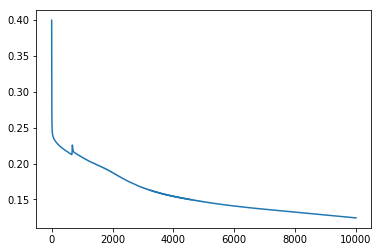

In [102]:
plt.plot(errors)
plt.show()

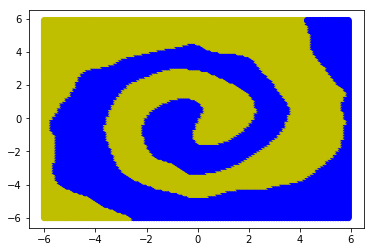

In [103]:
# generate a mesh grid act_range x act_range
mesh_x, mesh_y = np.meshgrid(activation_range, activation_range)
plt.scatter(mesh_x, mesh_y, c=['b' if np.round(pred) == 0 else 'y' for pred in predictions])
plt.show()
    

In [79]:
# for x_point, y_point, pred in list(zip(mesh_x, mesh_y, predictions)):
#     print(x_point, y_point, pred)
#     break
    
np_mesh_x = np.array(mesh_x)
print(np_mesh_x.shape)

(120, 120)
